## 10. 연관성 분석


### import

In [1]:
import pandas as pd
import numpy as np
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

for i in [pd, np, scipy, mpl, sns]:
    print(i.__name__, i.__version__)

pandas 0.25.1
numpy 1.18.5
scipy 1.5.2
matplotlib 3.5.3
seaborn 0.12.2


### 예제 데이터 준비

In [2]:
df_titanic = pd.read_csv('data/titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_berry = pd.read_csv('data/wild_blueberry.csv')
df_berry.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


### 1 연관성 분석

#### 변수 간의 연관성을 분석하기 위한 방법

| 변수 | | | 구분 | 분석 방법 |
|------|----------|----------|------|-----------|
| 수치형 | 이진범주형 | | 모수적 | • t-검정<br>• Paired t-검정 |
| | | | 비모수적 | • Mann-Whitney U<br>• Wilcoxon 부호 순위 검정 |
| | 수치형 | | 모수적 | Pearson 상관도 |
| | | | 비모수적 | • Spearman 상관도<br>• Kendall 계수 |
| | 범주형 | | 모수적 | 일원 분산분석 |
| | | | 비모수적 | Kruskal-Wallis |
| | 범주형1, 범주형2 교호항 | | 모수적 | 이원 분산분석 |
| 범주형 | 범주형 | | 비모수적 | 카이제곱 독립성 검정 |

### 2. 모수적 vs 비모수적 검정 방법

#### 모수적 검정 방법
- 데이터가 특정 분포(보통 정규분포)를 따른다고 가정
- 모수(평균, 분산, …)에 대해 검정

#### 비모수적 검정 방법
- 순위나 빈도 정보 활용
- 데이터가 특정 분포를 따른다는 가정 없음

- 특징
|   | 장점 | 단점 |
| --- | --- | --- |
| 모수적 검정 방법 | 검정력이 높고 정확도가 우수 | 가정이 틀리면 결과 왜곡 가능 |
| 비모수적 검정 방법 | 유연하고 이상치에 강함 | 검정력이 상대적으로 낮을 수 있음 |

### 3. 정규성 검정
#### 검정 내용
- $H_0$: 정규분포를 따름
- $H_1$: 정규분포를 따르지 않음

▷ 정규성을 가정하고 있는 방법에서 유효성을 확인하기 위해 사용


#### Shapiro-Wilk

- 소표본에 높은 정밀도를 보이는 검정법
- $𝑛\le50 \text{(n: 표본수)}$일 때 많이 사용

정렬된 표본: $x_{(1)} \leq x_{(2)} \leq \cdots x_{(n)}$

$W = \frac{\left(\sum_{i=1}^{n} a_i x_{(i)}\right)^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$

$a_i$: 정규분포 분위수 기반으로 계산된 가중치 계수

▷ W가 클수록 정규분포에 가까움

**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

정규 분포를 따르는 정도를 비교하기 위해,

표본의 수가 클수록 표본의 평균은 정규 분포에 가까워지는 성질을 이용하여 데이터셋을 만듭니다.

$\lambda=3$인 포아송 분포를 따르는 표본수를 3개로 할 때와 30개로 할 때의 표본의 평균을 각각 100개씩 만듭니다.
    

Q-Qplot으로 먼저 s_mean_3과 s_mean_30의 분포를 확인하고,
    
Shapiro-Wilk 검정으로 정규성 검정을 수행합니다.

In [4]:
from scipy.stats import poisson, norm
# lambda=3인 포아송 분포의 표본을 3개씩 뽑아 평균을 100개 만듭니다.
s_mean_3 = [poisson.rvs(mu=3, size=3).mean() for _ in range(100)]
# lambda=3인 포아송 분포의 표본을 30개씩 뽑아 평균을 100개 만듭니다.
s_mean_30 = [poisson.rvs(mu=3, size=30).mean() for _ in range(100)]

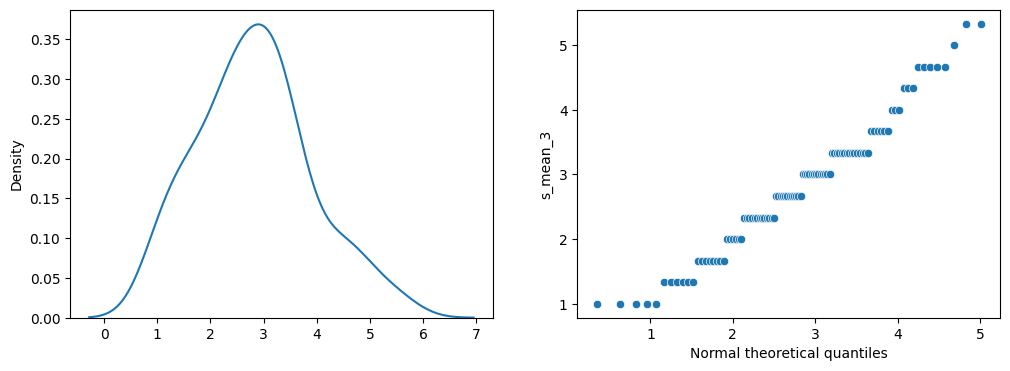

In [5]:
X = np.sort(s_mean_3) # 분위를 구하기 위해 정렬합니다
X_ppf = np.arange(0, 100) / 100 # 표본의 등분위(0~1사이)를 구합니다.
X_norm_ppf = norm.ppf(X_ppf, loc=np.mean(X), scale=np.std(X))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(X, ax=axes[0])
# 0분위와 1분위의 정규 분포의 확률 변수는 -∞과 ∞ 이므로 생략합니다.
sns.scatterplot(x=X_norm_ppf[1:-1], y=X[1:-1])
plt.gca().set_xlabel('Normal theoretical quantiles')
plt.gca().set_ylabel('s_mean_3')
plt.show()

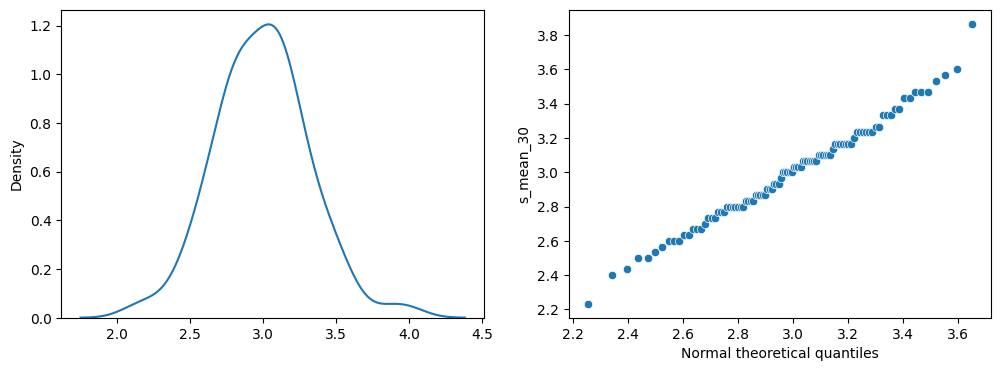

In [6]:
X = np.sort(s_mean_30) # 분위를 구하기 위해 정렬합니다
X_ppf = np.arange(0, 100) / 100 # 표본의 등분위(0~1사이)를 구합니다.
X_norm_ppf = norm.ppf(X_ppf, loc=np.mean(X), scale=np.std(X))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(X, ax=axes[0])
# 0분위와 1분위의 정규 분포의 확률 변수는 -∞과 ∞ 이므로 생략합니다.
sns.scatterplot(x=X_norm_ppf[1:-1], y=X[1:-1])
plt.gca().set_xlabel('Normal theoretical quantiles')
plt.gca().set_ylabel('s_mean_30')
plt.show()

In [7]:
from scipy.stats import shapiro
shapiro(s_mean_3), shapiro(s_mean_30)

(ShapiroResult(statistic=0.969482958316803, pvalue=0.020181775093078613),
 ShapiroResult(statistic=0.9897243976593018, pvalue=0.6423380970954895))

#### Jarque Bera

- 왜도(Skewness)는 0, 첨도(Kurtosis)는 3 에서 벗어날수록 정규성이 약해지는 성질 이용
> $𝐽𝐵=\frac{𝑛}{6}\left(𝑆^2+\frac{(K−3)^2}{4}\right) \sim \chi^2(2)$, 우측 꼬리 검정
- 계산이 간단
- 다수의 표본에서 안정적 성능(> 2000)

**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

정규 분포를 따르는 정도를 비교하기 위해,

표본의 수가 클수록 표본의 평균은 정규 분포에 가까워지는 성질을 이용하여 데이터셋을 만듭니다.

$\lambda=3$인 포아송 분포를 따르는 표본수를 3개, 30개, 50개로 할 때의 표본의 평균을 각각 2000개씩 만듭니다.
    
   
Jarque Bera 검정으로 정규성 검정을 수행합니다.

In [8]:
from scipy.stats import jarque_bera
(
    jarque_bera(
        [poisson.rvs(mu=3, size=3).mean() for _ in range(2000)],
    ),
    jarque_bera(
        [poisson.rvs(mu=3, size=30).mean() for _ in range(2000)]
    ),
    jarque_bera(
        [poisson.rvs(mu=3, size=50).mean() for _ in range(2000)]
    )
)

(Jarque_beraResult(statistic=33.484347858464695, pvalue=5.357550181273041e-08),
 Jarque_beraResult(statistic=7.432725218559456, pvalue=0.024322276765105344),
 Jarque_beraResult(statistic=1.680245193330934, pvalue=0.4316576004026199))

#### Kolmogorov Smirnov

- 표본의 누적분포함수(ECDF)와 비교 대상의 누적분포함수의 차이 이용
$𝐷=𝑠𝑢𝑝_{𝑥}[𝐹_𝑛(𝑥)−𝐹(𝑥)]$

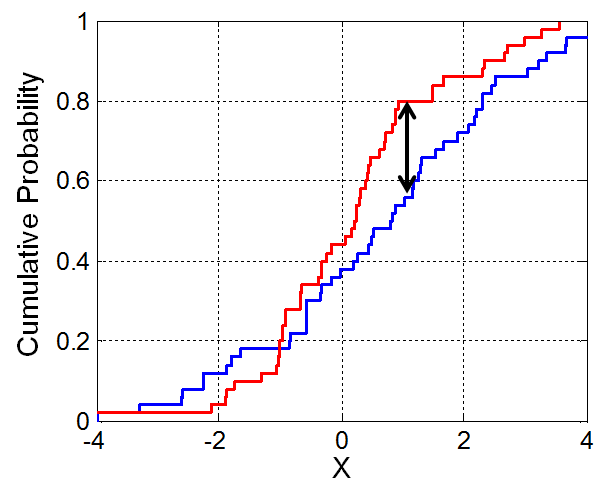


**[Ex.3]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

정규 분포를 따르는 정도를 비교하기 위해,

표본의 수가 클수록 표본의 평균은 정규 분포에 가까워지는 성질을 이용하여 데이터셋을 만듭니다.

$\lambda=3$인 포아송 분포를 따르는 표본수를 3개, 15개, 30개, 50개로 할 때의 표본의 평균을 각각 2000개씩 만듭니다.
    
   
Komogorov-Smirnov 검정으로 정규성 검정을 수행합니다.

In [9]:
from scipy.stats import kstest, zscore
from functools import partial

s_mean_3 = np.array([poisson.rvs(mu=3, size=3).mean() for _ in range(2000)])
s_mean_15 = np.array([poisson.rvs(mu=3, size=15).mean() for _ in range(2000)])
s_mean_30 = np.array([poisson.rvs(mu=3, size=30).mean() for _ in range(2000)])
s_mean_50 = np.array([poisson.rvs(mu=3, size=50).mean() for _ in range(2000)])
# Komogorov-Smirnov 정규성 검정을 할 경우, rvs에 표본을 전달하고 cdf에 정규분포에 대한 설정을합니다.
# 또한 정규 분포의 설정을 표본의 통계량으로 맞추거나, 표본을 표준화 하여 정규분포와의 비교가 되게 합니다.
# 아래는 4가지 방법으로 KS-test를 통한 정규성 검정을 수행한 것입니다.
(
    kstest(
        s_mean_3, norm.cdf, args=[s_mean_3.mean(), s_mean_3.std(ddof=1)]
    ),
    kstest(
        s_mean_15, partial(norm.cdf, loc=s_mean_15.mean(), scale = s_mean_15.std(ddof=1))
    ),
    kstest(zscore(s_mean_30, ddof=1), norm.cdf),
    kstest((s_mean_50 - s_mean_50.mean()) / s_mean_50.std(ddof=1), norm.cdf)
)

(KstestResult(statistic=0.0925129470586909, pvalue=2.396271978564206e-15),
 KstestResult(statistic=0.05018103132725049, pvalue=8.129722333645429e-05),
 KstestResult(statistic=0.033684203515444155, pvalue=0.020890548971936904),
 KstestResult(statistic=0.028260711865501997, pvalue=0.08040772968846588))

### 4. 등분산 검정

#### Bartlett 검정
- $H_0$: 전체 모집단의 분산이 같음
- $H_1$: 전체 모집단의 분산이 같지는 않음

> 두 개 이상의 모집단의 등분산성 검정
> 
> 모든 모집단이 정규분포를 따른다고 가정
> 
> 비모수 검정: Levene

- 검정통계량

$B = \frac{\sum_{i=1}^{k}(n_i - 1)\ln(\bar{s}^2/s_i^2)}{1 + \frac{1}{3(k-1)}\left(\sum_{i=1}^{k}\frac{1}{n_i-1} - \frac{1}{N-k}\right)} \sim \chi^2(k-1)$

$\bar{s}^2 = \frac{\sum_{i=1}^{k}(n_i-1)s_i^2}{\sum_{i=1}^{k}(n_i-1)}$

$k$: 집단의 수

$N$: 전체 표본의 수

$n_i$: $i$집단의 표본의 수

- 우측 꼬리 검정


**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

다음 거리 계산기 모집단이 등분산인지 조사해보세요. 세 모집단은 모두 정규 분포를 따릅니다.

기존 거리 계산기 기록
```
99.674, 100.299, 100.085, 99.548, 99.826, 100.495, 99.272, 99.871, 100.380, 99.740, 
99.796, 99.972, 100.447, 99.808, 99.867, 99.870, 100.662, 100.656, 100.301, 100.116, 
100.221, 100.447, 99.719, 100.353, 99.624, 99.809, 100.272, 99.571, 99.958, 99.741
```

신형 거리 계산기 기록
```
99.696, 100.279, 100.079, 99.578, 99.838, 100.462, 99.321, 99.880, 100.354, 99.757, 
99.810, 99.973, 100.418, 99.821, 99.876, 99.878, 100.618, 100.612, 100.281, 100.108, 
100.206, 100.417, 99.738, 100.329, 99.649, 99.821, 100.254, 99.600, 99.961, 99.759, 
99.928, 99.216, 99.504, 99.804, 100.260
```

경쟁사 거리 계산기 기록
```
99.653, 100.319, 100.091, 99.518, 99.815, 100.528, 99.223, 99.863, 100.405, 99.723, 
99.783, 99.970, 100.477, 99.796, 99.858, 99.861, 100.706, 100.700, 100.321, 100.124, 
100.236, 100.477, 99.701, 100.376, 99.599
```
</div>

In [10]:
s_A = pd.Series(
    [99.674, 100.299, 100.085, 99.548, 99.826, 100.495, 99.272, 99.871, 100.380, 99.740, 
    99.796, 99.972, 100.447, 99.808, 99.867, 99.870, 100.662, 100.656, 100.301, 100.116, 
    100.221, 100.447, 99.719, 100.353, 99.624, 99.809, 100.272, 99.571, 99.958, 99.741], name='m'
)
s_B = pd.Series(
    [99.696, 100.279, 100.079, 99.578, 99.838, 100.462, 99.321, 99.880, 100.354, 99.757, 
    99.810, 99.973, 100.418, 99.821, 99.876, 99.878, 100.618, 100.612, 100.281, 100.108, 
    100.206, 100.417, 99.738, 100.329, 99.649, 99.821, 100.254, 99.600, 99.961, 99.759, 
    99.928, 99.216, 99.504, 99.804, 100.260], name='m'
)
s_C = pd.Series(
    [99.653, 100.319, 100.091, 99.518, 99.815, 100.528, 99.223, 99.863, 100.405, 99.723, 
    99.783, 99.970, 100.477, 99.796, 99.858, 99.861, 100.706, 100.700, 100.321, 100.124, 
    100.236, 100.477, 99.701, 100.376, 99.599], name='m'
)

df_m = pd.concat(
    [a.to_frame().assign(model=b) for a, b in zip([s_A, s_B, s_C], ['A', 'B', 'C'])]
)
df_m

,m,model
0,99.674,A
1,100.299,A
2,100.085,A
3,99.548,A
4,99.826,A
...,...,...
20,100.236,C
21,100.477,C
22,99.701,C
23,100.376,C


$B = \frac{(N - k) \ln(S_p^2) - \sum_{i=1}^k(n_i - 1)ln(S_i^2)}{1 + \frac{1}{3(k-1)} \left(\sum_{i=1}^{k}\left(\frac{1}{n_i-1}\right) - \frac{1}{N-k}\right)} \sim \chi^2(k - 1)$ 

In [11]:
from scipy.stats import chi2
# Pooled Variance를 구합니다.

s_nm1 = df_m['model'].value_counts() - 1
s_var = df_m.groupby('model')['m'].var()
n, k = len(df_m), 3
# sp2 = (s_var * s_nm1).sum() / s_nm1.sum()
sp2 = s_var.dot(s_nm1) / s_nm1.sum()
# B의 분모를 구합니다.
B_num = (n - k) * np.log(sp2) - np.log(s_var).dot(s_nm1)
# B의 분자를 구합니다.
B_denom = 1 + 1 / (3 * (k - 1)) * ((1 / s_nm1).sum() - 1 / (n - k))
B = B_num / B_denom
print("검정통계량(B): {}, pvalue: {}".format(B, chi2.sf(B, k - 1)))

검정통계량(B): 0.4463582365057818, pvalue: 0.7999715469550519


In [12]:
# scipy.stats.bartlett 으로도 구할 수 있습니다.
from scipy.stats import bartlett
bartlett(s_A, s_B, s_C)

BartlettResult(statistic=0.4463582365057818, pvalue=0.7999715469550519)

### 5. Mann-Whitney U

- 두 모집단 간의 분포의 위치(중앙값)에 대한 검정
> $H_0$: 두 집단의 분포에 차이가 없음

- 특징
> 비모수적 검정 방법
> 
> 두 집단 간의 값들의 경향성 분석

- 검정 통계량

> $U_1 = R_1 - \frac{m(m+1)}{2} \quad U_2 = R_2 - \frac{n(n+1)}{2}$
>
> $R_1$: 집단 1의 순위합 $\qquad$ $R_2$: 집단 2의 순위합
>
> $m$: 집단 1의 표본수 $\qquad$ $n$: 집단 2의 표본수
>
> $U = \min(U_1, U_2)$

U는 표본수가 커짐에 따라 정규분포에 수렴

소표본에서는 보다 강인한 permutation test를,  
대표본에서는 정규분포를 사용

$Z = \frac{U - \frac{mn}{2}}{\sqrt{\frac{mn(m+n+1)}{12}}}$

**[Ex.5]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">
t-검정과 mann-whitney 검정과의 검정력 차이를 비교합니다.

1. $X_1 \sim N(0, 1), X_2 \sim N(0.3, 1)$  50개의 표본을 뽑아, 두 분포의 모평균 검정을 수행합니다.
    
2. $X_1 \sim Exp(1), X_2 \sim Exp(1) + 0.3$ 50개의 표본을 뽑아, 두 분포의 모평균 검정을 수행합니다.

    
2000번의 실험을 하여 둘 의 평균은 다릅니다 귀무 가설을 기각한 비율을 측정합니다.
    
</div>

In [13]:
import numpy as np
from scipy import stats
import pandas as pd

np.random.seed(0)

# 반복 실험 횟수
n_iter = 2000
# 각 그룹의 샘플 수
n = 50
# 유의수준
alpha = 0.05

def run_tests(dist1, dist2):
    """
    두 분포에서 데이터를 생성한 후
    t-test와 Mann–Whitney U-test의 p-value를 계산해
    귀무가설 기각 여부를 반환.
    """
    g1 = dist1(size=n)
    g2 = dist2(size=n)
    
    t_p = stats.ttest_ind(g1, g2).pvalue
    u_p = stats.mannwhitneyu(g1, g2, alternative="two-sided").pvalue
    
    return t_p < alpha, u_p < alpha

results = {
    "scenario": [],
    "t_power": [],
    "mw_power": []
}

# -----------------------------
# 1) 정규성 충족 (정규분포, t-test 유리)
# -----------------------------
t_rejects, mw_rejects = [], []

for _ in range(n_iter):
    t_r, mw_r = run_tests(
        lambda size: stats.norm.rvs(0, 1, size),
        lambda size: stats.norm.rvs(0.3, 1, size)
    )
    t_rejects.append(t_r)
    mw_rejects.append(mw_r)

results["scenario"].append("정규성 충족(정규분포)")
results["t_power"].append(np.mean(t_rejects))
results["mw_power"].append(np.mean(mw_rejects))


# -----------------------------
# 2) 정규성 위반 (왜도 큰 지수분포, Mann–Whitney 유리)
# -----------------------------
t_rejects, mw_rejects = [], []

for _ in range(n_iter):
    t_r, mw_r = run_tests(
        lambda size: stats.expon.rvs(scale=1, size=size),
        lambda size: stats.expon.rvs(scale=1, size=size) + 0.3
    )
    t_rejects.append(t_r)
    mw_rejects.append(mw_r)

results["scenario"].append("정규성 위반(비정규: 지수분포)")
results["t_power"].append(np.mean(t_rejects))
results["mw_power"].append(np.mean(mw_rejects))


# 결과 데이터프레임 출력
df = pd.DataFrame(results)
df


,scenario,t_power,mw_power
0,정규성 충족(정규분포),0.313,0.2910
1,정규성 위반(비정규: 지수분포),0.338,0.6275


정규 분포를 따를 경우에는 t-검정의 검출률이 manwhitney-u 검정 보다 높고, 

그렇지 않을 경우 manwhitney-u 검정이 높을 것을 알 수 있습니다.

### 6. Wilcoxon 부호 순위 검정
- 대응 관계의 두 모집단간의 분포의 위치(중앙값)에 대한 검정
> $H_0$: 대응 관계의 두 집단의 분포(또는 중앙값)에 차이가 없음
- 특징
> 비모수적 검정 방법
> 
> 두 집단 간의 값들의 경향성 분석
- 검정 통계량

> $d_i = x_i - y_i$
>
>$d_i = 0$인 항목은 제외하고, $|d_i|$를 기준으로 순위 부여
>
> 원래 부호(+/-)에 따라 순위 따라
>
> $W^+$: 양의 부호 순위합  
> $W^-$: 음의 부호 순위합
>
> ▷ $W = \min(W^+, W^-)$
>
> W는 표본수가 커짐에 따라 정규분포에 수렴
>
> 소표본에서는 보다 강인한 permutation test,  
> 대표본에서는 정규분포를 사용
>
> $Z = \frac{W - \frac{n(n+1)}{4}}{\sqrt{\frac{n(n+1)(2n+1)}{24}}}$

**[Ex.6]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

$X \sim N(0, 2^2)$ 이고 $X' \sim X + Uniform(-0.1, 0.9)

인 분포를 지닌 각 10개의 대응 표본을 만들어 permutation test을 사용하여,
Wilcoxon 검증을 수행합니다.

</div>

In [14]:
np.random.seed(12)
n = 10
X = stats.norm.rvs(scale=2, size=n)
X_prime = X + stats.uniform.rvs(size= n) - 0.1

d = X - X_prime
d = d[d != 0]
rnk = stats.rankdata(np.abs(d))
W = min((rnk* (d > 0)).sum(), (rnk* (d < 0)).sum())
W

4.0

In [15]:
n_d = len(d)

n_sampling = 3000 # permuation 횟수
W_perm = list()
for i in range(n_sampling):
    perm = np.random.choice([0, 1], n_d)
    W_perm.append(
        min((rnk * perm).sum(), (rnk * (1 - perm)).sum())
    )
W_perm = np.array(W_perm)

In [16]:
W_perm_mean = W_perm.mean()
pvalue = np.mean(
    np.abs(W_perm - W_perm_mean) > np.abs(W - W_perm_mean)
)
pvalue

0.010333333333333333

### 7. 상관도 분석

#### 분석 내용
- 두 변수 X,Y 간의 관계가 어느 방향(+ 또는 -)으로 함께 변화하는지를 수치로 표현
> 주의: 상관 관계 ≠ 인과 관계
- 상관 관계의 유무를 가설 검정을 통해 도출

$𝐻_0: 𝑟=0$

$𝐻1: 𝑟\ne0$


#### 피어슨(Pearson) 상관도 분석

- 특징
> 이상치에 민감
> 비선형 관계를 포착하지 못함
- 상관도
$r = \frac{\sum_{i=1}^{n}(x_i - \overline{X})(y_i - \overline{Y})}{\sqrt{\sum_{i=1}^{n}(x_i - \overline{X})^2 \sum_{i=1}^{n}(y_i - \overline{Y})^2}}$

- 가설 검정
> 가정: X, Y 는 이변량 정규분포를 따름
- 검정통계량
$t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}} \sim t(n-2)$

**[Ex.7]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

df_berry 에서 AverageRainingDays 와 yield의 피어슨 상관계수와 pvalue를 구해봅니다. 
    
</div>

In [17]:
from scipy.stats import t
r = (df_berry[['AverageRainingDays', 'yield']] - df_berry[['AverageRainingDays', 'yield']].mean()).pipe(
    lambda x: x['AverageRainingDays'].dot(x['yield']) / (((x['AverageRainingDays'] ** 2).sum()** 0.5)  * ((x['yield'] ** 2).sum()) ** 0.5)
)
n = len(df_berry)
r, t.cdf(-abs(r * np.sqrt((n - 2) / (1 - r ** 2))), n - 2) * 2

(-0.5412149291795618, 2.4718840451077928e-60)

In [18]:
from scipy.stats import pearsonr
pearsonr(
    df_berry['AverageRainingDays'], df_berry['yield']
)

(-0.5412149291795613, 2.4718840451083787e-60)

#### 스피어만(Spearman) 상관도 분석

- 특징
> 피어슨 상관도에 비해 이상치에 덜 민감
> 비선형 관계라도 단조 관계는 포착 가능
- 상관도

> $𝑟_𝑠=𝑃𝑒𝑎𝑟𝑠𝑜𝑛(𝑅𝑋,𝑅𝑌)$
>
> $𝑅_𝑋, 𝑅_𝑌$: X와 Y의 순위
> 
> 동점 순위가 없다면: $r_s = 1 - \frac{6\sum_{i=1}^{n}d_i^2}{n(n^2-1)}$

- 가설 검정

> $t = \frac{r_s\sqrt{n-2}}{\sqrt{1-r_s^2}} \sim t(n-2)$
>
> 통계량은 근사화한 결과이므로, 소표본에서는 보다 강인한 permuation test 와 같은 방법을 사용

**[Ex.8]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

df_berry 에서 AverageRainingDays 와 yield의 스피어만 상관계수와 pvalue를 구해봅니다. 
    
</div>

In [19]:
r = df_berry[['AverageRainingDays', 'yield']].rank().pipe(
    lambda x: (x[['AverageRainingDays', 'yield']] - x[['AverageRainingDays', 'yield']].mean())
).pipe(
    lambda x: x['AverageRainingDays'].dot(x['yield']) / (((x['AverageRainingDays'] ** 2).sum()** 0.5)  * ((x['yield'] ** 2).sum()) ** 0.5)
)

n = len(df_berry)
r, t.cdf(-abs(r * np.sqrt((n - 2) / (1 - r ** 2))), n - 2) * 2

(-0.5457355008780836, 1.6439967933834573e-61)

In [20]:
from scipy.stats import spearmanr
spearmanr(
    df_berry['AverageRainingDays'], df_berry['yield']
)

SpearmanrResult(correlation=-0.5457355008780836, pvalue=1.6439967933834573e-61)

#### 켄달의 순위 상관계수

- 특징
> 스피어만보다 이상치에 더 강건, 작은 데이터에서도 안정적
> 
> 큰 데이터에서 느림: 시간 복잡도: $O(n^2)$
- 상관도: 모든 가능한 두 변수의 대소 비교 결과를 통해 도출

  경우의 수: $\binom{n}{2} = \frac{1}{2}n(n-1)$

  C: 일치(Concordant)한 경우의 수
  D: 불일치(Discordant)한 경우의 수
  
$\tau = \frac{C-D}{C + D}$

- 가설 검정: $\tau \sim N\left(0, \frac{2(2n+5)}{9n(n-1)}\right)$
> 근사적 정규분포:소표본에서는 보다 강인한 permuation test 와 같은 방법을 사용


In [21]:
from itertools import combinations
x = df_berry['seeds'].values
y = df_berry['yield'].values
Con, Dis = 0, 0
for a, b in combinations(range(n), 2):
    sign = (x[a] - x[b]) * (y[a] - y[b])
    Con += sign > 0
    Dis += sign < 0

In [22]:
r = (Con - Dis) / (Con + Dis)
r, norm.cdf(-abs(r), scale=(2*(2 * n + 5) / (9 * n * (n - 1))) ** 0.5) * 2

(0.8476230280353991, 6.739265764198718e-274)

In [23]:
from scipy.stats import kendalltau
kendalltau(df_berry['seeds'], df_berry['yield'])

KendalltauResult(correlation=0.8476230280353992, pvalue=6.739265764200253e-274)

### 8. 분산분석

- 분석 내용: 셋 이상의 모집단의 모평균의 차이를 검정

> $H_0: \mu_1 = \mu_2 = \cdots = \mu_k$ (모든 집단의 평균은 같음)
>
> $H_1: \mu_1 \neq \mu_2\ or\ \mu_1 \neq \mu_3\ or\ ...\ or\ \mu_{k-1} \neq \mu_k$ (적어도 하나의 집단의 평균은 다름)
>
> → 집단의 구분 기준: **범주형 변수**

- 가정

> 각각의 모집단의 분산은 같음
> 
> 각각의 모집단은 정규분포를 따름

- 검정통계량

> $F = \frac{MSR}{MSE} = \frac{SSR/(k-1)}{SSE/(n-k)}$
> 
> $k$: 집단의 수 , $n$: 표본의 수
>
> ▷ 정규방정식으로 추정된 **선형 회귀 모델**과 대응되는 개념

**[Ex.9]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

단일 요인에 대한 분산분석입니다.

데이터셋을 만들어봅니다. df_ind: factor별 평균이 값은 데이터셋, df_dep: factor별 평균이 다른 데이터 셋입니다.
    
df_ind에서 factor 에 대한 X의 모집단에 대한 분산분석을 합니다.

</div>

In [24]:
from scipy.stats import norm
import matplotlib.lines as mlines

In [25]:
mu = {'A': 0.3, 'B': 0.3, 'C': 0.3}
sig = 0.2
n = {'A': 30, 'B': 25, 'C': 35}

df_ind = pd.concat([
    pd.DataFrame(norm.rvs(loc=mu[i], scale=sig, size=n[i], random_state=123), columns=['X']).assign(factor=i)
    for i in ['A', 'B', 'C']
], axis=0)

mu = {'A': 0.3, 'B': 0.5, 'C': 0.7}
sig = 0.2
n = {'A': 30, 'B': 25, 'C': 35}

df_dep = pd.concat([
    pd.DataFrame(norm.rvs(loc=mu[i], scale=sig, size=n[i], random_state=123), columns=['X']).assign(factor=i)
    for i in ['A', 'B', 'C']
], axis=0)

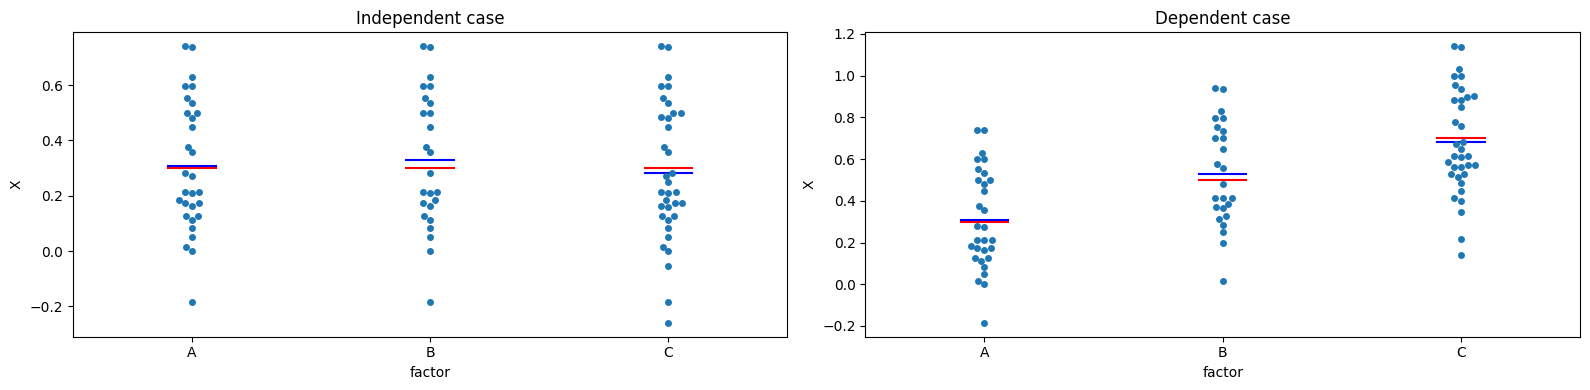

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].set_title('Independent case')
sns.swarmplot(data=df_ind, x='factor', y='X', ax=axes[0])
for i, c in enumerate(['A', 'B', 'C']):
    x_bar = df_ind.loc[df_ind['factor'] == c, 'X'].mean()
    axes[0].add_line(mlines.Line2D([-0.1 + i, 0.1 + i], [0.3, 0.3], c='r'))
    axes[0].add_line(mlines.Line2D([-0.1 + i, 0.1 + i], [x_bar, x_bar], c='b'))

axes[1].set_title('Dependent case')
sns.swarmplot(data=df_dep, x='factor', y='X', ax=axes[1])
for i, c in enumerate(['A', 'B', 'C']):
    x_bar = df_dep.loc[df_dep['factor'] == c, 'X'].mean()
    axes[1].add_line(mlines.Line2D([-0.1 + i, 0.1 + i], [0.3 + 0.2 * i, 0.3 + 0.2 * i], c='r'))
    axes[1].add_line(mlines.Line2D([-0.1 + i, 0.1 + i], [x_bar, x_bar], c='b'))

plt.tight_layout()
plt.show()

In [27]:
from statsmodels.formula.api import ols
from statsmodels.api import stats

lm = ols('X ~ C(factor)', data=df_ind).fit()
df_anova = stats.anova_lm(lm)
df_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(factor),2.0,0.033030,0.016515,0.275669,0.759725
Residual,87.0,5.212032,0.059908,NaN,NaN


In [28]:
from scipy.stats import f_oneway
f_oneway(
    *df_ind.groupby('factor')['X'].agg(list)
)

F_onewayResult(statistic=0.27566921886248474, pvalue=0.7597245063787699)

#### 정규방정식과 분산분석

$𝑦_{𝑖𝑗}=𝑎_𝑗+𝑒_{𝑖𝑗}$
> $y_{ij}$: 범주 j에 속한 i번째 관측값
> $a_j$: 범주 j의 예측값

$SSE = \sum_{j=1}^{g}\sum_{i=1}^{n_j}(y_{ij} - a_j)^2$

$SSR = \sum_{j=1}^{g}\sum_{i=1}^{n_j}(a_j - \bar{y})^2 = \sum_{j=1}^{g}n_j(a_j - \bar{y})^2$

$SST = SSR + SSE$

▷ 그룹별 종속변수의 평균으로 예측하는 것  = 정규방정식으로 추정된 선형 회귀 모델로 예측하는 것

$\frac{\partial SSE}{\partial a_j} = \sum_{i=1}^{n_j}-2(y_{ij} - a_j) = 0$

$a_j = \frac{\sum_{i=1}^{n_j}y_{ij}}{n_j}$


**[Ex.10]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

위 과정으로 직접 일원 분산 분석을 수행합니다.

</div>

In [29]:
from scipy.stats import f

def ss(v):
    return v.dot(v)

sst = ss(df_ind['X'] - df_ind['X'].mean())
ssr = ss(df_ind.groupby('factor')['X'].transform('mean') - df_ind['X'].mean())
sse = ss(df_ind['X'] - df_ind.groupby('factor')['X'].transform('mean'))
         
n, k = len(df_ind), df_ind['factor'].nunique()
df_ssr = k - 1
df_sse = n - k
F = (ssr / df_ssr) / (sse / df_sse)
print("검정통계량(F): {}, pvalue: {}".format(F, f.sf(F, df_ssr, df_sse)))
sst, ssr, sse

검정통계량(F): 0.2756692188624849, pvalue: 0.7597245063787699


(5.245061365254395, 0.03302980845858671, 5.212031556795809)

**[Ex.11]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

df_dep에서 categ 에 대한 X의 모집단에 대한 분산분석을 합니다.

분산 분석에 앞서 categ의 범주에 따라 모집단이 정규분포를 따르는지 Kolmogorov-smironof 검정으로 확인하고,

Bartlett 검정을 통해 서로 등분산인지 확인합니다.
    
</div>

In [30]:
from scipy.stats import kstest, zscore
df_dep.groupby('factor')['X'].apply(
    lambda x: pd.Series(kstest(zscore(x, ddof=1), norm.cdf), index=['stat', 'pvalue'])
).unstack()

,stat,pvalue
factor,,
A,0.155033,0.423738
B,0.157950,0.510746
C,0.120307,0.647730


In [31]:
from scipy.stats import bartlett
bartlett(*df_dep.groupby('factor')['X'].agg(list))

BartlettResult(statistic=0.08114650401701767, pvalue=0.9602388225127009)

In [32]:
from scipy.stats import f_oneway
f_oneway(*df_dep.groupby('factor')['X'].agg(list))

F_onewayResult(statistic=18.753725760815882, pvalue=1.6907914024262457e-07)

#### 선형회귀모델의 유의미성 검정
- $𝐻_0:𝛽_1=𝛽_2=…=𝛽_𝑝=0$ (선형회귀모델은 무의미) → 모든 집단의 평균은 같음
- $𝐻_1:𝛽_1≠0 𝑜𝑟 𝛽_2≠0 𝑜𝑟…𝛽_𝑝≠0$ (선형회귀모델은 유의미) → 적어도 하나의 집단의 평균은 다름

$F = \frac{MSR}{MSE} = \frac{SSR/(k-1)}{SSE/(n-k)}$

- k: 집단의 수, n: 표본의 수

####  분산 분석의 비모수 검정법: Kruskal-Wallis



#### 이원분산분석

- 상호작용(교호작용)

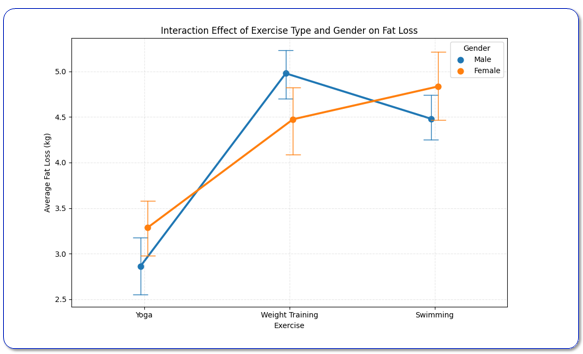

#### 이원분산분석
- 두 개의 범주형 변수와 상호작용(교호)항의 선형회귀모델과 대응

$𝑆𝑆𝑇=𝑆𝑆𝑅+𝑆𝑆𝐸$

$𝑆𝑆𝑅=𝑆𝑆𝐴+𝑆𝑆𝐵+𝑆𝑆𝐴𝐵$

> $SSA = \sum_{j=1}^{g_a} na_j(a_j - \bar{y})^2$
>
> $SSB = \sum_{j=1}^{g_b} nb_j(b_j - \bar{y})^2$
>
> $\bar{y}_{ij} = \bar{y} + a_i - \bar{y} + b_j - \bar{y} = a_i + b_j - \bar{y}$
>
> $SSAB = \sum_{i=1}^{g_a}\sum_{j=1}^{g_b} nab_{ij}(ab_{ij} - \bar{y}_{ij})^2$

#### 이원 분산 분석 테이블

| 요인 | 제곱합 | 자유도 | 평균제곱 | F |
|------|--------|--------|----------|---|
| A | $$SSA = \sum_{j=1}^{g_a} na_j(a_j - \bar{y})^2$$ | $$g_a - 1$$ | $$MSA = \frac{SSA}{g_a - 1}$$ | $$\frac{MSA}{MSE}$$ |
| B | $$SSB = \sum_{j=1}^{g_b} nb_j(b_j - \bar{y})^2$$ | $$g_b - 1$$ | $$MSB = \frac{SSB}{g_b - 1}$$ | $$\frac{MSB}{MSE}$$ |
| A×B | $$SSAB = \sum_{i=1}^{g_a}\sum_{j=1}^{g_b} nab_{ij}(ab_{ij} - \bar{y}_{ij})^2$$ | $$(g_a - 1)(g_b - 1)$$ | $$MSAB = \frac{SSAB}{(g_a - 1)(g_b - 1)}$$ | $$\frac{MSAB}{MSE}$$ |
| 오차(Error) | $$SSE$$ | $$N - g_a g_b$$ | $$MSE = \frac{SSE}{N - g_a g_b}$$ | |
| 전체(Total) | $$SST$$ |$$N - 1$$ | | |

**[Ex.12]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

교호 작용이 있는 데이터셋을 만들고 이원분산분석을 합니다.

</div>

In [33]:
import itertools 
mu = {
    ('A', '1'): 0.2, ('A', '2') : 0.3, ('A','3') : 0.4,
    ('B', '1'): 0.3, ('B', '2') : 0.4, ('B','3') : 0.2
}
sig = 0.2
n = {
    ('A', '1'): 15, ('A', '2') : 25, ('A','3') : 20,
    ('B', '1'): 20, ('B', '2') : 30, ('B','3') : 25
}

df_two = pd.concat([
    pd.DataFrame(norm.rvs(loc=mu[(i, j)], scale=sig, size=n[(i, j)], random_state=123), columns=['y']).assign(factor_1=i, factor_2=j)
    for i,j in itertools.product(['A', 'B'], ['1', '2', '3'])
], axis=0)

**상호작용차트**를 통해 상호작용이 있음을 확인합니다.

<AxesSubplot:xlabel='factor_2', ylabel='y'>

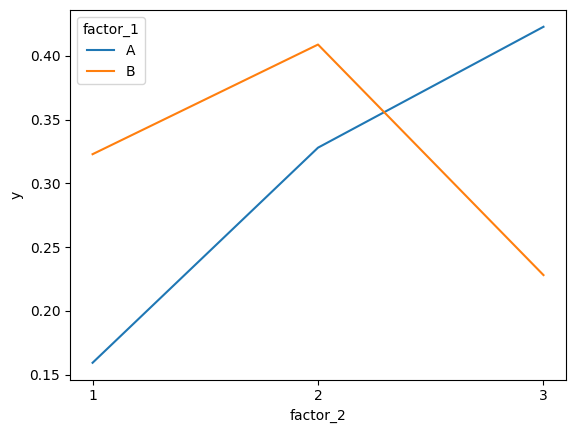

In [34]:
df_two.groupby(['factor_1', 'factor_2'], as_index=False)['y'].mean().pipe(
    lambda x: sns.lineplot(data=x, x='factor_2', y='y', hue='factor_1')
)

statsmodel를 통한 방법입니다. 

※ ols의 formula(patsy 식) 두 범주형 변수의 교호항 가변수화는 C(변수명1):C(변수명2)로 표현하면됩니다.

In [35]:
lm = ols('y ~ C(factor_1) + C(factor_2) + C(factor_1):C(factor_2)', data=df_two).fit()
df_anova = stats.anova_lm(lm)
df_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(factor_1),1.0,0.002269,0.002269,0.038022,0.845706
C(factor_2),2.0,0.309988,0.154994,2.597120,0.078379
C(factor_1):C(factor_2),2.0,0.737363,0.368682,6.177722,0.002741
Residual,129.0,7.698618,0.059679,NaN,NaN


In [36]:
from scipy.stats import f

def ss(v):
    return v.dot(v)

anova = list()
y_bar = df_two['y'].mean()
y_true = df_two['y']
sst = ss(df_two['y'] - y_bar)

y_prd = df_two.groupby(['factor_1', 'factor_2'])['y'].transform('mean')
ssr = ss(y_prd - y_bar)
sse = ss(y_true - y_prd)
dof_e = len(df_two) - df_two['factor_1'].nunique() * df_two['factor_2'].nunique()
dof_a, dof_b = df_two['factor_1'].nunique() - 1, df_two['factor_2'].nunique() - 1

y_a = df_two.groupby('factor_1')['y'].transform('mean')
ssr_a = ss(y_a - y_bar)
anova.append(pd.Series([dof_a, ssr_a], index = ['df', 'sum_sq'], name = 'factor_1'))

y_b = df_two.groupby('factor_2')['y'].transform('mean')
ssr_b = ss(y_b - y_bar)
anova.append(pd.Series([dof_b, ssr_b], index = ['df', 'sum_sq'], name = 'factor_2'))

y_prd_ab = y_bar + (y_a - y_bar) + (y_b - y_bar)
ssr_ab = ss(y_prd - y_prd_ab)
anova.append(pd.Series([dof_a * dof_b, ssr_ab], index = ['df', 'sum_sq'], name = 'factor_1:factor_2'))
df_anova = pd.DataFrame(anova).assign(
    mean_sq = lambda x: x['sum_sq'] / x['df'],
    F = lambda x: x['mean_sq'] / (sse / dof_e),
    p_value = lambda x: f.sf(x['F'], x['df'], len(df_two) - x['df'].sum())
)
df_anova
ssr, ssr_a + ssr_b + ssr_ab

(1.0496203274992597, 1.0485254825190724)

In [37]:
s_a = df_two.groupby('factor_1')['y'].mean()
s_b = df_two.groupby('factor_2')['y'].mean()

(
    df_two.groupby(['factor_1', 'factor_2'])['y'].apply(
        lambda x: (x.mean() - s_a.loc[x.name[0]] - s_b.loc[x.name[1]] + y_bar) ** 2
    ) * df_two.groupby(['factor_1', 'factor_2']).size()
).sum()


0.7374966936938376

### 9. 카이제곱 검정

#### 검정 방법
- 관측 빈도와 기대 빈도의 차이를 통한 검정
- 검정통계량
> $\chi^2 = \sum_{i} \frac{(O_i - E_i)^2}{E_i} \sim \chi^2(df)$, 우측 꼬리 검정
- 검정의 내용과 관점에 따라 크게 3 가지로 구분
> 적합도(Goodness-of-Fit) 검정
> 
> 독립성(Independence) 검정
> 
> 동질성(Homogeneity) 검정



#### 적합도(Goodness-of-Fit) 검정

- $H_0: P(X = 1) = p_1, P(X = 2) = p_2, ... P(X = k) = p_k$ (모집단은 이론적 분포를 따름)

- $H_1: P(X = 1) \neq p_1\ or\ P(X = 2) \neq p_2, ... P(X = k) \neq p_k$ (모집단은 이론적 분포에 따르지 않음)

| 변수값<br/>$$(i)$$ | 1 | 2 | ... | k |
|------------|---|---|-----|---|
| 이론적 확률<br/>$$P(X = i)$$ | $$p_1$$ | $$p_2$$ | ... | $$p_k$$ |

- 검정통계량 계산

| 변수값<br/>$$(i)$$ | 1 | 2 | ... | k |
|------------|---|---|-----|---|
| 관측빈도<br/>$$(X = i)$$  | $$O_1$$ | $$O_2$$ | ... | $$O_k$$ |

$O_𝑖$: 변수값 i가 관측된 빈도, $𝐸_𝑖=𝑁𝑝𝑖$: 변수값 i의 기대 빈도

$\chi^2=\sum_{𝑖=1}^𝑘\frac{(𝑂_𝑖−𝐸_𝑖)^2}{𝐸_𝑖} \sim \chi^2(𝑘−1)$

**[Ex.13]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

df_titanic 에서 성별(Sex)의 비율이 아래와 같은지.

|Sex|p|
|---|---|
|male|0.5|
|female|0.5|

검정해 보세요.
    
</div>

In [38]:
from scipy.stats import chi2
n = len(df_titanic)
np = pd.Series([0.5, 0.5], index=['male', 'female']) * n
Chi2 = ((df_titanic['Sex'].value_counts() - np) ** 2 / np).sum()
print("검정통계량(Chi2): {}, pvalue: {}".format(Chi2, chi2.sf(Chi2, df_titanic['Sex'].nunique() - 1)))

검정통계량(Chi2): 77.63075196408529, pvalue: 1.2422095313910336e-18


### 카이제곱 검정

- 독립성(Independence) 검정
> $H_0$: 두 변수는 독립 $𝐻_0:𝑃(𝐴_𝑖\cap𝐵_𝑗)=𝑃(𝐴_𝑖)𝑃(𝐵_𝑗)$
> 
> $H_1$: 두 변수는 독립이 아님 $𝐻_0:𝑃(𝐴_𝑖\cap𝐵_𝑗)\neq𝑃(𝐴_𝑖)𝑃(𝐵_𝑗)$


- 검정통계량 계산

$\chi^2 = \sum_{i=1}^{m} \sum_{j=1}^{n} \frac{(O_{ij} - E_{ij})^2}{E_{ij}} \sim \chi^2 \big( (m - 1)(n - 1) \big)$


**[Ex.14]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

df_titanic 에서 Survived와 Embarked가 독립인지 카이제곱 독립성 검정으로 검정해봅니다.
    
</div>

In [39]:
df_O = pd.crosstab(index = df_titanic['Survived'], columns = df_titanic['Embarked'])
df_O

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [40]:
from scipy.stats import chi2_contingency
chi2_contingency(df_O)

(26.48914983923762,
 1.769922284120912e-06,
 2,
 array([[103.7480315,  47.5511811, 397.7007874],
        [ 64.2519685,  29.4488189, 246.2992126]]))

#### 관측 빈도수 테이블

|   | $$A_1$$ | $$A_2$$ | … | $$A_n$$ | 행 합계 |
| --- | --- | --- | --- | --- | --- |
| $$B_1$$ |   |   | … |   | $$N_1$$ |
| $$B_2$$ |   |   | … |   | $$N_2$$ |
| … | … | … | … | … | … |
| $$B_m$$ |   |   | … |   | $$N_m$$ |
| 열합계 | $$M_1$$ | $$M_2$$ | … | $$M_m$$ |   |

▷ 행합계, 열합계: 기대 빈도 계산에서 활용

#### 기대 빈도수 테이블

$E_{ij}=\frac{N_i}{N}\frac{M_j}{N}N=\frac{N_i}{M_j}{N}$

▷ 관측빈도수 테이블에서 구한 두 변수에서 빈도수

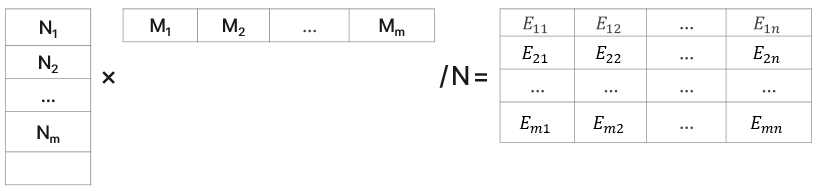

**[Ex.15]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

위 과정을 직접해봅니다.
    
</div>

In [41]:
# 예상 빈도수는 위 두 행렬의 행렬 곱으로 구할 수 있습니다.
# 곱의 기준이 되는 Survived의 빈도 테이블 컬럼명과 Embarked의 인덱스명을 동일하게(val) 맞춰야 정상 동작합니다.
df_E = df_titanic['Survived'].value_counts().rename('val').to_frame().dot(
    df_titanic['Embarked'].value_counts(normalize=True).rename('val').to_frame().T
)
df_E

,S,C,Q
0,397.700787,103.748031,47.551181
1,247.748031,64.629921,29.622047


In [42]:
Chi2 = ((df_O -df_E) ** 2 / df_E).sum().sum()
dof = (df_titanic['Survived'].nunique() - 1) * (df_titanic['Embarked'].nunique() - 1)
Chi2, chi2.sf(Chi2, dof), dof, df_E

(26.405183076782006,
 1.8458115025518752e-06,
 2,
             S           C          Q
 0  397.700787  103.748031  47.551181
 1  247.748031   64.629921  29.622047)

#### 동질성(Homogeneity) 검정

- 해석의 맥락이 다를 뿐, 방식은 독립성 검정과 같음
> $H_0$: 두 변수는 다른 분포에서 나왔음
> 
> $H_1$: 두 변수는 동일 분포에서 나왔음
